In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [0]:
import numpy as np
import pandas as pd
from scipy import stats as st
from sklearn.metrics import confusion_matrix
import math
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
import seaborn as sns
import random
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn import neural_network
from sklearn import datasets
from itertools import product
from mlxtend.classifier import EnsembleVoteClassifier
import copy
sns.set(rc={'figure.figsize':(5,5)})
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('dataset_smoted.csv', sep = ",", header=0).iloc[:,1:].astype('float')

y1 = df[['Tumor']]
X = df.drop(['Tumor'], axis=1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
X_test = pd.read_csv('df_carac_test.csv', sep = ",", header=0, index_col=0)
y_test = pd.read_csv('df_y_test.csv', sep = ",", header=0, index_col=0)
X_test = X_test[X.columns]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

## Análisis preeliminar

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

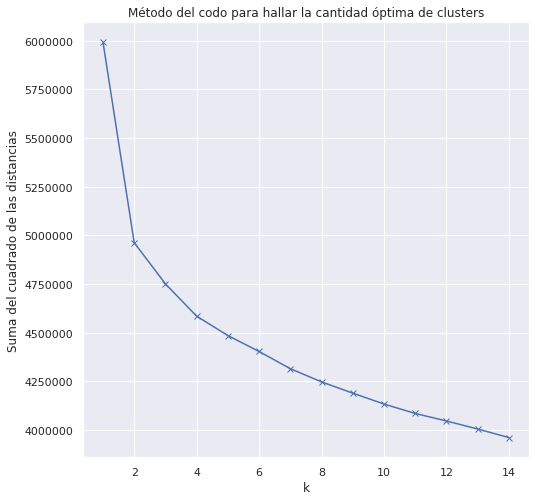

In [0]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma del cuadrado de las distancias')
plt.title('Método del codo para hallar la cantidad óptima de clusters')
plt.show()

In [0]:
K = 2
km = KMeans(n_clusters=K) 
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
centroids = km.cluster_centers_
centroids.shape

(2, 9082)

In [0]:
idx = list(km.labels_)
samples = list(df.index)
print(idx)
print(samples)

[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 

In [0]:
tablita = pd.DataFrame(
    {'idx': idx,
     'y': y.values.ravel()})

In [0]:
len([i for i, j in zip(idx, y.values.ravel()) if i == j])/len(idx)

0.8711498973305954

In [0]:
# Scaling attribute values to avoid few outiers
cols = X.columns[0:10]
subset_df = X[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)


In [0]:
final_df = pd.concat([scaled_df, y], axis=1)
final_df.head()

,RFC2,HSPA6,PAX8,GUCA1A,THRA,PTPN21,CCL5,CYP2E1,EPHB3,ESRRA,Tumor
0,-0.471185,-1.705388,1.914465,-0.473100,1.691113,0.497665,-0.374142,0.398077,-0.959257,1.603629,1.0
1,-1.000726,1.391741,0.580162,0.041409,-0.830731,-0.706896,0.349730,-0.457606,2.007771,-0.472653,1.0
2,-1.391275,-0.859656,0.465040,0.561292,1.507059,-1.258592,-0.920104,0.958097,0.391718,1.237048,1.0
3,1.135661,0.186705,0.681319,0.867969,-0.327683,-1.137050,-0.386583,-0.866691,2.402191,1.133082,1.0
4,2.478427,-2.026359,-0.985009,1.019894,1.024216,-1.653899,-2.641072,6.453578,0.606756,3.516064,1.0


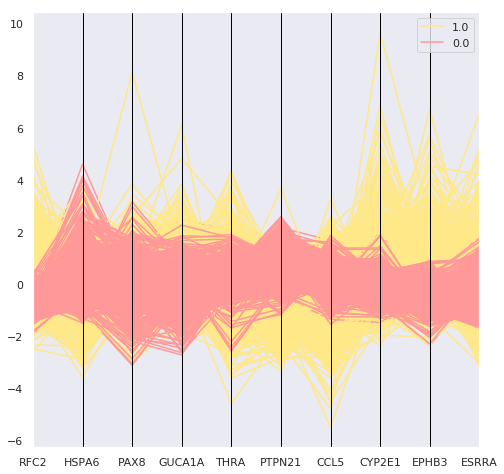

In [0]:
# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'Tumor', color=('#FFE888', '#FF9999'))

In [0]:
# Scatter Plot with Hue for visualizing data in 3-D

Xy = pd.concat([X, y], axis=1)

cols = pd.concat([Xy[0:4],y], axis=1).columns
pp = sns.pairplot(Xy[cols], hue='Tumor', height=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Expresión genética a pares', fontsize=14)



In [0]:
Xy.head()

,RFC2,HSPA6,PAX8,GUCA1A,THRA,PTPN21,CCL5,CYP2E1,EPHB3,ESRRA,CYP2A6,SCARB1,TTLL12,LINC00152,WFDC2,MAPK1,ADAM32,SPATA17,PRR22,PXK,VPS18,MSANTD3,SLC46A1,TIMD4,SLC39A5,ATP6V1E2,AFG3L1P,CILP2,PIGX,TMEM196,SLC39A13,BEST4,AK9,CORO6,TMEM106A,ALG10,TTC39C,NEXN,C15orf40,RAX2,...,DPF1,SMARCB1,CHRNA5,GRIN2A,SLC2A2,XIAP,MRAS,CYP4F12,GLB1L,KLKB1,SMARCA2,CD28,SYCP2,PPEF1,INSL4,NUP155,KLHL24,TAC1,THUMPD1,CLUL1,ZNF702P,MIA,AKR1B10,OPRL1,SMA4,SLC7A1,TNP1,IL24,PSG11,PTP4A3,CDKL5,CEACAM1,VIP,NKX2-5,EFEMP2,ADGRG1,KRBOX4,LY96,MKRN3,Tumor
0,7.407253,6.204863,8.095520,5.415445,7.583902,7.852030,8.700219,5.336146,6.876974,8.209689,6.337378,8.472052,9.592294,4.037827,11.960187,8.273791,3.710529,6.184728,5.262566,6.988536,7.442556,8.017039,6.868443,3.734183,7.351920,5.803096,5.082037,5.285802,6.797279,4.687908,7.539919,3.899067,4.993603,4.731796,5.289668,4.467448,7.071395,7.750493,7.507153,6.372316,...,5.665427,7.058852,4.589996,4.630960,3.285501,9.350405,7.974948,6.799313,6.052795,5.250386,9.385324,4.932647,3.775187,4.184792,6.029930,7.009808,8.385115,3.331011,8.886485,3.628287,3.980185,10.730756,11.501456,4.951772,5.596105,9.602614,5.058940,4.245336,3.935324,7.412531,4.726577,6.512507,3.116127,5.548750,9.165610,10.151242,6.880232,9.969742,3.838012,1.0
1,7.123130,9.571917,7.713950,5.524888,6.521715,6.562020,9.463812,4.869831,8.651825,7.524439,6.792868,7.215739,7.820553,4.800296,9.652900,8.387023,3.790175,4.867427,5.555911,6.470041,6.694509,7.865227,6.775776,3.520910,6.639331,5.939561,6.104655,5.844467,6.209490,4.548614,8.107617,3.629168,4.383930,4.720145,5.367991,5.209278,7.128311,6.500195,6.724820,6.705220,...,5.117834,6.961695,3.623140,4.343284,3.369918,9.885140,7.637548,5.933176,6.413146,5.028126,8.585609,5.188967,3.748200,3.781760,4.074017,8.081139,8.748958,3.831345,8.907810,3.769394,4.063474,5.343234,6.539597,5.301405,6.251008,8.595977,5.477763,4.402177,4.202494,8.045272,4.379235,9.373695,2.865539,6.067992,8.942705,11.232603,7.889566,9.425093,3.537451,1.0
2,6.913583,7.124304,7.681029,5.635474,7.506380,5.971188,8.124298,5.641336,7.685116,8.088704,6.676825,6.271829,7.923400,4.411978,12.030296,8.341712,3.411909,3.665718,5.055155,7.012309,7.067541,8.072279,6.563121,3.698045,6.244219,5.552842,6.704413,5.559559,7.710178,4.808438,7.561447,3.675803,4.712736,4.510318,5.492269,3.650273,10.078010,5.623186,7.196058,6.491831,...,5.417765,7.632133,3.821807,4.609599,3.140366,10.527270,7.264266,5.984499,5.977472,5.732411,8.408930,4.441103,3.340208,3.439751,4.103417,7.720581,9.442246,2.971437,9.141352,3.566078,3.727950,5.778822,4.271846,5.067746,6.553988,8.096978,5.384451,4.941295,4.194393,5.890944,4.124105,6.852570,3.467253,5.833873,7.728383,10.594633,6.848785,7.832617,3.898009,1.0
3,8.269397,8.261858,7.742878,5.700708,6.733596,6.101352,8.687095,4.646895,8.887764,8.054391,6.322472,8.095853,8.765869,4.437958,8.413734,8.895672,3.842700,5.876491,4.922976,5.976445,6.846830,7.661499,6.941072,3.435661,6.187267,6.422086,7.066251,5.601832,7.818187,4.328076,7.693133,4.004105,5.687191,4.292941,5.238326,4.347060,7.633299,6.117128,7.388982,6.347638,...,5.318295,7.752443,5.913596,4.299841,3.063797,9.434471,8.244588,5.669271,6.447835,5.014674,8.639521,4.568071,6.611726,3.406370,3.813070,7.971651,9.687826,2.827409,8.246166,5.064825,4.823515,5.659988,3.821531,4.589128,6.457474,8.673705,5.235744,3.962395,3.996402,7.216246,4.402420,6.774328,2.981992,5.294247,7.757590,9.464898,7.524853,8.304161,3.770603,1.0
4,8.989851,5.855919,7.266360,5.733025,7.303009,5.547839,6.308892,8.636168,7.813750,8.840865,6.610658,8.131180,10.207226,4.571704,9.740826,9.132486,3.160109,4.951635,5.287033,5.741862,6.764211,6.797436,6.943303,3.596228,6.082801,6.408388,6.818458,5.645551,7.592188,4.436275,6.883914,3.505326,4.424904,4.312881,5.112056,6.115428,9.024834,3.941173,7.658199,6.496743,...,6.053118,7.804659,6.001228,4.571630,2.799604,9.920486,5.871433,7.224919,5.164154,4.781147,7.807237,3.878693,4.734358,3.385596,3.897174,8.758859,8.359535,2.750796,8.665638,3.414271,5.045215,5.689633,12.774530,4.802906,5

In [0]:
Xy = pd.concat([X, y1], axis=1)

In [0]:
cols = pd.concat([Xy.iloc[:,0:4], y1], axis=1).columns 

'RFC2'

Text(0.5, 0, 'WFDC2')

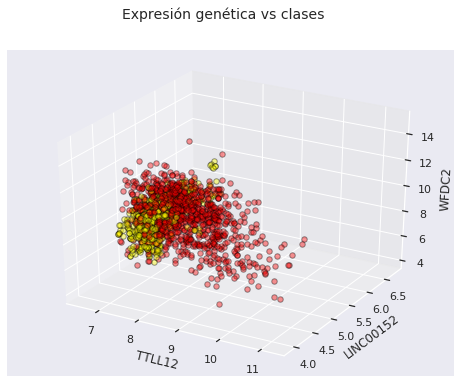

In [0]:
# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and depth

fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Expresión genética vs clases', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(Xy[Xy.columns[12]])
ys = list(Xy[Xy.columns[13]])
zs = list(Xy[Xy.columns[14]])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 1 else 'yellow' for wt in list(Xy['Tumor'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel(Xy.columns[12])
ax.set_ylabel(Xy.columns[13])
ax.set_zlabel(Xy.columns[14])

## Entrenamiento del modelo SVM

In [0]:
svc = svm.SVC(kernel='linear', probability=True)

Cs = np.logspace(-6, -1, 10)
Gs = 10.0 ** np.arange(-4, 4)

clf1_grid = GridSearchCV(estimator=svc, param_grid=dict(C=Cs, gamma=Gs), n_jobs=-1, scoring = 'recall', cv=2)

In [0]:
clf1_grid.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=True, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01]),
                         'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [0]:
svm_best = clf1_grid.best_estimator_
print(svm_best, ". Recall:", clf1_grid.best_score_)

SVC(C=0.007742636826811277, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False) . Recall: 0.9763860369609856



---
C = 0.007742636826811277

---

gamma = 0.0001


---



In [0]:
C_best = 0.007742636826811277
gamma_best = 0.0001

In [0]:
clf1 = modelo_svm = SVC(kernel='linear',
                        C = C_best,
                        gamma = gamma_best,
                        probability = True)

In [0]:
clf1.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.007742636826811277, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_preds = clf1.predict_proba(X)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y, preds)
auc_score = metrics.auc(fpr, tpr)

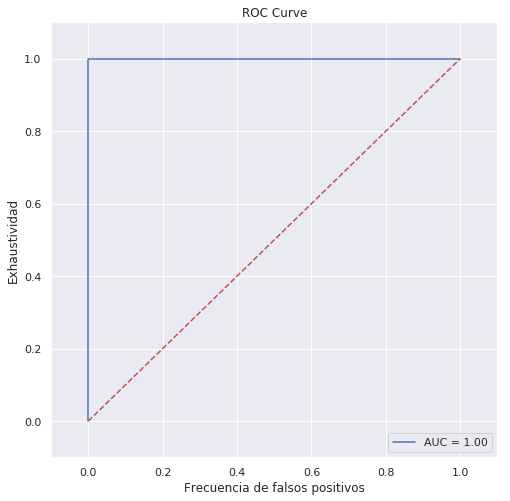

In [0]:
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('Exhaustividad')
plt.xlabel('Frecuencia de falsos positivos')

plt.legend(loc='lower right')
plt.show()

In [0]:
y_preds = (y_preds > 0.5).astype(int)
a = []
for i in range(0,len(y_preds)):
  if y_preds[i][0] == 1:
    a.append(0)
  elif y_preds[i][1] == 1:
    a.append(1)

In [0]:
c_matrix = confusion_matrix(y,a)
c_matrix

array([[974,   0],
       [  0, 974]])

In [0]:
tn = c_matrix[0,0]
tp = c_matrix[1,1]
fn = c_matrix[1,0]
fp = c_matrix[0,1]

print("Recall:", tp/(tp+fn))
print("Specificity:", tn/(tn+fp))
print("Precision:", tp/(tp+fp))
print("Negative predictive value:", tn/(tn+fn))
print("Acuracy:", (tp+tn)/(tp+tn+fp+fn))
print("Matthews correlation coefficient:", (tp*tn-fp*fn)/((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**(1/2.0))
print("Cohen Kappa", cohen_kappa_score(y,a))

Recall: 1.0
Specificity: 1.0
Precision: 1.0
Negative predictive value: 1.0
Acuracy: 1.0
Matthews correlation coefficient: 1.0
Cohen Kappa 1.0


**Conjunto de datos de prueba:**

In [0]:
y_preds = clf1.predict_proba(X_test)
preds = y_preds[:,1]

y_preds = (y_preds > 0.5).astype(int)
a = []
for i in range(0,len(y_preds)):
  if y_preds[i][0] == 1:
    a.append(0)
  elif y_preds[i][1] == 1:
    a.append(1)
    
c_matrix = confusion_matrix(y_test,a)
c_matrix

array([[  9,   3],
       [  0, 112]])

In [0]:
tn = c_matrix[0,0]
tp = c_matrix[1,1]
fn = c_matrix[1,0]
fp = c_matrix[0,1]

print("Recall:", tp/(tp+fn))
print("Specificity:", tn/(tn+fp))
print("Precision:", tp/(tp+fp))
print("Negative predictive value:", tn/(tn+fn))
print("Acuracy:", (tp+tn)/(tp+tn+fp+fn))
print("Matthews correlation coefficient:", (tp*tn-fp*fn)/((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**(1/2.0))
print("Cohen Kappa", cohen_kappa_score(y_test,a))

Recall: 1.0
Specificity: 0.75
Precision: 0.9739130434782609
Negative predictive value: 1.0
Acuracy: 0.9758064516129032
Matthews correlation coefficient: 0.8546547739343037
Cohen Kappa 0.8442211055276382


## Entrenamiento del modelo Redes Neuronales

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(2,2000),
                    solver='lbfgs')

In [0]:
iters = [500]
alphas = [1e-5]

clf2_grid = GridSearchCV(mlp,
                         param_grid = dict(max_iter = iters, alpha = alphas),
                         n_jobs = -1,
                         scoring = 'recall',
                         cv = 2,
                         verbose = 10)

In [0]:
clf2_grid.fit(X, y)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(2, 2000),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'a

In [0]:
nn_best = clf2_grid.best_estimator_
print(nn_best, ". Recall:", clf2_grid.best_score_)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2000), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False) . Recall: 0.5




---

max_iter = 500


---
alpha = 0.01


---

hidden_layer_sizes = 2000

---




In [0]:
clf2 = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2000), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

clf2.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2000), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
y_preds = clf2.predict_proba(X)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y, preds)
auc_score = metrics.auc(fpr, tpr)

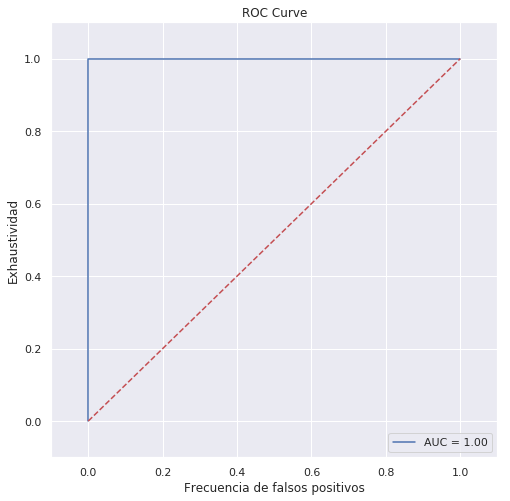

In [0]:
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('Exhaustividad')
plt.xlabel('Frecuencia de falsos positivos')

plt.legend(loc='lower right')
plt.show()

In [0]:
y_preds = (y_preds > 0.5).astype(int)
a = []
for i in range(0,len(y_preds)):
  if y_preds[i][0] == 1:
    a.append(0)
  elif y_preds[i][1] == 1:
    a.append(1)

In [0]:
c_matrix = confusion_matrix(y,a)
c_matrix

array([[974,   0],
       [  0, 974]])

In [0]:
tn = c_matrix[0,0]
tp = c_matrix[1,1]
fn = c_matrix[1,0]
fp = c_matrix[0,1]

print("Exhaustividad:", tp/(tp+fn))
print("Especificidad:", tn/(tn+fp))
print("Precisión:", tp/(tp+fp))
print("Valor predictivo negativo:", tn/(tn+fn))
print("Exactitud:", (tp+tn)/(tp+tn+fp+fn))
print("Coeficiente de correlación de Matthews:", (tp*tn-fp*fn)/((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**(1/2.0))
print("Cohen Kappa", cohen_kappa_score(y,a))

Exhaustividad: 1.0
Especificidad: 1.0
Precisión: 1.0
Valor predictivo negativo: 1.0
Exactitud: 1.0
Coeficiente de correlación de Matthews: 1.0
Cohen Kappa 1.0


**Conjunto de datos de prueba**

In [0]:
y_preds = clf3.predict_proba(X_test)
preds = y_preds[:,1]

y_preds = (y_preds > 0.5).astype(int)
a = []
for i in range(0,len(y_preds)):
  if y_preds[i][0] == 1:
    a.append(0)
  elif y_preds[i][1] == 1:
    a.append(1)
    
c_matrix = confusion_matrix(y_test,a)
c_matrix

array([[ 10,   2],
       [  8, 104]])

In [0]:
tn = c_matrix[0,0]
tp = c_matrix[1,1]
fn = c_matrix[1,0]
fp = c_matrix[0,1]

print("Recall:", tp/(tp+fn))
print("Specificity:", tn/(tn+fp))
print("Precision:", tp/(tp+fp))
print("Negative predictive value:", tn/(tn+fn))
print("Acuracy:", (tp+tn)/(tp+tn+fp+fn))
print("Matthews correlation coefficient:", (tp*tn-fp*fn)/((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**(1/2.0))
print("Cohen Kappa", cohen_kappa_score(y_test,a))

Recall: 0.9285714285714286
Specificity: 0.8333333333333334
Precision: 0.9811320754716981
Negative predictive value: 0.5555555555555556
Acuracy: 0.9193548387096774
Matthews correlation coefficient: 0.6394566926188594
Cohen Kappa 0.6228710462287105


## Entrenamiento del modelo Naive Bayes

In [0]:
parameters = {"var_smoothing" : np.linspace(1e-01,1e-10,10).astype(int)}

In [0]:
clf3_grid = GridSearchCV(GaussianNB(), parameters, n_jobs=-1, scoring = 'recall', cv=2, verbose=10)
clf3_grid.fit(X, y)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=-1,
             param_grid={'var_smoothing': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=10)

In [0]:
nb_best = clf3_grid.best_estimator_
print(nb_best, ". Recall:", clf3_grid.best_score_)

GaussianNB(priors=None, var_smoothing=0) . Recall: 0.9342915811088296




---

var_smoothing = 0

---



In [0]:
var_smoothing_best = 0

In [0]:
clf3 = GaussianNB(var_smoothing = var_smoothing_best)
clf3.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=0)

In [0]:
y_preds = clf3.predict_proba(X)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y, preds)
auc_score = metrics.auc(fpr, tpr)

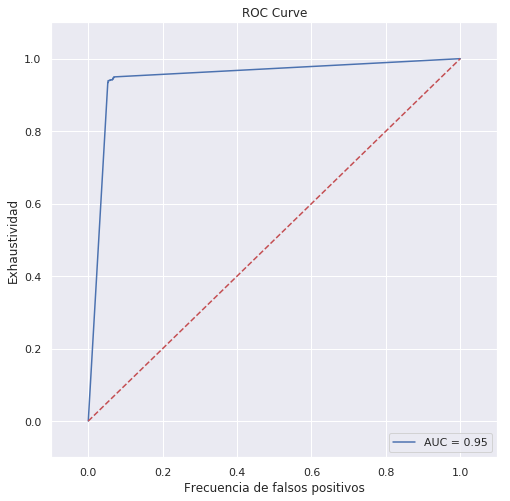

In [0]:
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('Exhaustividad')
plt.xlabel('Frecuencia de falsos positivos')

plt.legend(loc='lower right')
plt.show()

In [0]:
y_preds = (y_preds > 0.5).astype(int)
a = []
for i in range(0,len(y_preds)):
  if y_preds[i][0] == 1:
    a.append(0)
  elif y_preds[i][1] == 1:
    a.append(1)

In [0]:
c_matrix = confusion_matrix(y,a)
c_matrix

array([[923,  51],
       [ 66, 908]])

In [0]:
tn = c_matrix[0,0]
tp = c_matrix[1,1]
fn = c_matrix[1,0]
fp = c_matrix[0,1]

print("Recall:", tp/(tp+fn))
print("Specificity:", tn/(tn+fp))
print("Precision:", tp/(tp+fp))
print("Negative predictive value:", tn/(tn+fn))
print("Acuracy:", (tp+tn)/(tp+tn+fp+fn))
print("Matthews correlation coefficient:", (tp*tn-fp*fn)/((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**(1/2.0))
print("Cohen Kappa", cohen_kappa_score(y,a))

Recall: 0.9322381930184805
Specificity: 0.9476386036960985
Precision: 0.9468196037539103
Negative predictive value: 0.9332659251769464
Acuracy: 0.9399383983572895
Matthews correlation coefficient: 0.8799811566337873
Cohen Kappa 0.8798767967145791


**Conjunto de datos de prueba**

In [0]:
y_preds = clf3.predict_proba(X_test)
preds = y_preds[:,1]

y_preds = (y_preds > 0.5).astype(int)
a = []
for i in range(0,len(y_preds)):
  if y_preds[i][0] == 1:
    a.append(0)
  elif y_preds[i][1] == 1:
    a.append(1)
    
c_matrix = confusion_matrix(y_test,a)
c_matrix

array([[ 10,   2],
       [  8, 104]])

In [0]:
tn = c_matrix[0,0]
tp = c_matrix[1,1]
fn = c_matrix[1,0]
fp = c_matrix[0,1]

print("Recall:", tp/(tp+fn))
print("Specificity:", tn/(tn+fp))
print("Precision:", tp/(tp+fp))
print("Negative predictive value:", tn/(tn+fn))
print("Acuracy:", (tp+tn)/(tp+tn+fp+fn))
print("Matthews correlation coefficient:", (tp*tn-fp*fn)/((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**(1/2.0))
print("Cohen Kappa", cohen_kappa_score(y_test,a))

Recall: 0.9285714285714286
Specificity: 0.8333333333333334
Precision: 0.9811320754716981
Negative predictive value: 0.5555555555555556
Acuracy: 0.9193548387096774
Matthews correlation coefficient: 0.6394566926188594
Cohen Kappa 0.6228710462287105


## Entrenamiento del modelo Random Forest

In [0]:
parameters = { 
    'n_estimators': [30, 50, 75, 100, 150, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8, 15, 20],
    'criterion' :['gini', 'entropy']
}

In [0]:
clf4_grid = GridSearchCV(RandomForestClassifier(), 
                         param_grid=parameters, 
                         cv = 2, 
                         n_jobs = -1, 
                         scoring = 'recall', 
                         verbose = 10)
clf4_grid.fit(X, y)

In [0]:
rf_best = clf4_grid.best_estimator_
print(rf_best, ". Recall:", clf4_grid.best_score_)



---


n_estimators_best = 50


---


max_features_best = 'sqrt'


---


max_depth_best = 8


---


criterion_best = 'entropy'



---




In [0]:
clf4 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                              max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                              min_impurity_decrease=0.0, min_impurity_split=None,
                              min_samples_leaf=1, min_samples_split=2,
                              min_weight_fraction_leaf=0.0, n_estimators=50,
                              n_jobs=None, oob_score=False, random_state=None,
                              verbose=0, warm_start=False)
clf4.fit(X, y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_preds = clf4.predict_proba(X)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y, preds)
auc_score = metrics.auc(fpr, tpr)

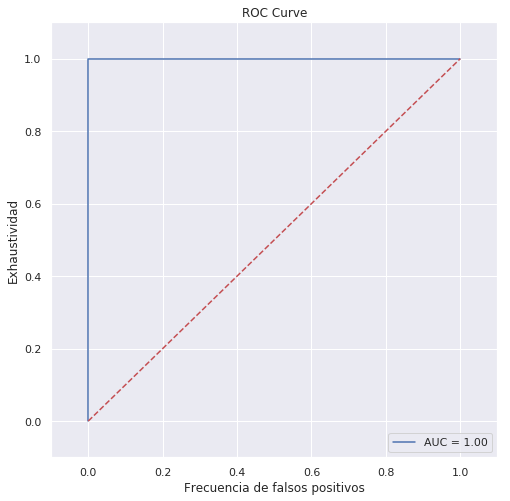

In [0]:
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('Exhaustividad')
plt.xlabel('Frecuencia de falsos positivos')

plt.legend(loc='lower right')
plt.show()

In [0]:
y_preds = (y_preds > 0.5).astype(int)
a = []
for i in range(0,len(y_preds)):
  if y_preds[i][0] == 1:
    a.append(0)
  elif y_preds[i][1] == 1:
    a.append(1)

In [0]:
c_matrix = confusion_matrix(y,a)
c_matrix

array([[974,   0],
       [  3, 971]])

In [0]:
tn = c_matrix[0,0]
tp = c_matrix[1,1]
fn = c_matrix[1,0]
fp = c_matrix[0,1]

print("Recall:", tp/(tp+fn))
print("Specificity:", tn/(tn+fp))
print("Precision:", tp/(tp+fp))
print("Negative predictive value:", tn/(tn+fn))
print("Acuracy:", (tp+tn)/(tp+tn+fp+fn))
print("Matthews correlation coefficient:", (tp*tn-fp*fn)/((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**(1/2.0))
print("Cohen Kappa", cohen_kappa_score(y,a))

Recall: 0.9969199178644764
Specificity: 1.0
Precision: 1.0
Negative predictive value: 0.9969293756397134
Acuracy: 0.9984599589322382
Matthews correlation coefficient: 0.9969246467408792
Cohen Kappa 0.9969199178644764


**Conjunto de datos de prueba**

In [0]:
y_preds = clf4.predict_proba(X_test)
preds = y_preds[:,1]

y_preds = (y_preds > 0.5).astype(int)
a = []
for i in range(0,len(y_preds)):
  if y_preds[i][0] == 1:
    a.append(0)
  elif y_preds[i][1] == 1:
    a.append(1)
    
c_matrix = confusion_matrix(y_test,a)
c_matrix

array([[ 11,   1],
       [  2, 110]])

In [0]:
tn = c_matrix[0,0]
tp = c_matrix[1,1]
fn = c_matrix[1,0]
fp = c_matrix[0,1]

print("Recall:", tp/(tp+fn))
print("Specificity:", tn/(tn+fp))
print("Precision:", tp/(tp+fp))
print("Negative predictive value:", tn/(tn+fn))
print("Acuracy:", (tp+tn)/(tp+tn+fp+fn))
print("Matthews correlation coefficient:", (tp*tn-fp*fn)/((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**(1/2.0))
print("Cohen Kappa", cohen_kappa_score(y_test,a))

Recall: 0.9821428571428571
Specificity: 0.9166666666666666
Precision: 0.990990990990991
Negative predictive value: 0.8461538461538461
Acuracy: 0.9758064516129032
Matthews correlation coefficient: 0.8674293933420475
Cohen Kappa 0.866571018651363


## Ensemble de clasificadores

Disminuir la varianza aplicando un método del tipo Bagging

In [0]:
predicciones_base_train = pd.concat([pd.DataFrame(clf1.predict_proba(X_train)),
                                     pd.DataFrame(clf2.predict_proba(X_train)),
                                     pd.DataFrame(clf3.predict_proba(X_train)),
                                     pd.DataFrame(clf4.predict_proba(X_train))], axis=1)
predicciones_base_train.columns = ['SVM_0', 'SVM_1', 'NN_0', 'NN_1', 'NB_0', 'NB_1', 'RF_0', 'RF_1']
predicciones_base_train['Tumor'] = y_train.values

predicciones_base_train = predicciones_base_train.round(4)
predicciones_base_train.head()

,SVM_0,SVM_1,NN_0,NN_1,NB_0,NB_1,RF_0,RF_1,Tumor
0,0.0000,1.0000,0.0,1.0,0.0,1.0,0.0200,0.9800,1.0
1,1.0000,0.0000,1.0,0.0,1.0,0.0,0.9940,0.0060,0.0
2,0.9977,0.0023,1.0,0.0,1.0,0.0,0.9956,0.0044,0.0
3,0.0000,1.0000,0.0,1.0,0.0,1.0,0.0597,0.9403,1.0
4,0.9873,0.0127,1.0,0.0,1.0,0.0,0.9535,0.0465,0.0


In [0]:
np.random.seed(43)

df = pd.DataFrame(columns=('w1', 'w2', 'w3', 'w4', 'recall', 'specificity', 'precision', 'npv', 'accuracy', 'mcc', 'kappa'))

i = 0
for w1 in range(1,7):
  for w2 in range(1,7):
    for w3 in range(1,7):
      for w4 in range(1,7):

          if len(set((w1,w2,w3,w4))) == 1: 
            continue

          eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3, clf4], weights=[w1, w2, w3, w4], refit=False, voting='soft')
          eclf.fit(X_train, y_train.values.ravel())
          y_predict = eclf.predict(X_val)
          
          c_matrix = confusion_matrix(y_val,y_predict)
          recall = tp/(tp+fn)
          specificity = tn/(tn+fp)
          precision = tp/(tp+fp)
          npv = tn/(tn+fn)
          accuracy = (tp+tn)/(tp+tn+fp+fn)
          mcc = (tp*tn-fp*fn)/((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**(1/2.0)
          kappa = cohen_kappa_score(y_val,y_predict)
          
          df.loc[i] = [w1, w2, w3, w4, recall, specificity, precision, npv, accuracy, mcc, kappa]
          i += 1

In [0]:
df.sort_values(by=['recall', 'kappa'], ascending=False).head(20)

,w1,w2,w3,w4,recall,specificity,precision,npv,accuracy,mcc,kappa
0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
df.loc[df['recall'].idxmax()]

w1             1.0
w2             1.0
w3             1.0
w4             2.0
recall         1.0
specificity    1.0
precision      1.0
npv            1.0
accuracy       1.0
mcc            1.0
kappa          1.0
Name: 0, dtype: float64



---
w1 = 1


---
w2 = 1


---
w3 = 1


---
w4 = 2

---




In [0]:
w1 = 1
w2 = 1
w3 = 1
w4 = 2

In [0]:
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3, clf4],
                              weights=[w1,w2,w3,w4],
                              refit=False,
                              voting='soft')


In [0]:
eclf.fit(X, y.values.ravel())

EnsembleVoteClassifier(clfs=[SVC(C=0.007742636826811277, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma=0.0001, kernel='linear', max_iter=-1,
                                 probability=True, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                             MLPClassifier(activation='relu', alpha=1e-05,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stop...
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=8,
                                                    max_features='sqrt',
                                                    max_leaf_node

In [0]:
y_preds = eclf.predict_proba(X)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y, preds)
auc_score = metrics.auc(fpr, tpr)

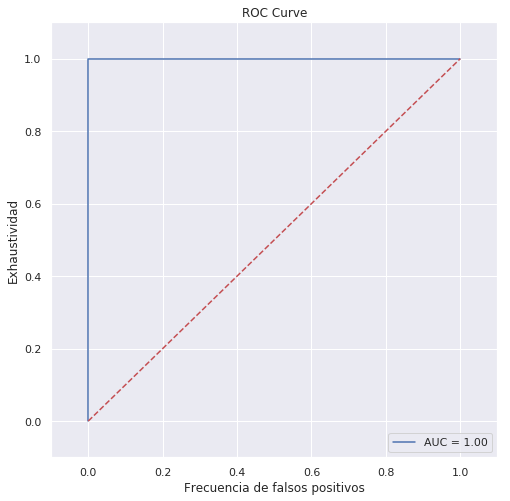

In [0]:
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('Exhaustividad')
plt.xlabel('Frecuencia de falsos positivos')

plt.legend(loc='lower right')
plt.show()

In [0]:
y_preds = (y_preds > 0.5).astype(int)
a = []
for i in range(0,len(y_preds)):
  if y_preds[i][0] == 1:
    a.append(0)
  elif y_preds[i][1] == 1:
    a.append(1)

In [0]:
c_matrix = confusion_matrix(y,a)
c_matrix

array([[974,   0],
       [  0, 974]])

In [0]:
tn = c_matrix[0,0]
tp = c_matrix[1,1]
fn = c_matrix[1,0]
fp = c_matrix[0,1]

print("Recall:", tp/(tp+fn))
print("Specificity:", tn/(tn+fp))
print("Precision:", tp/(tp+fp))
print("Negative predictive value:", tn/(tn+fn))
print("Acuracy:", (tp+tn)/(tp+tn+fp+fn))
print("Matthews correlation coefficient:", (tp*tn-fp*fn)/((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**(1/2.0))
print("Cohen Kappa", cohen_kappa_score(y,a))

Recall: 1.0
Specificity: 1.0
Precision: 1.0
Negative predictive value: 1.0
Acuracy: 1.0
Matthews correlation coefficient: 1.0
Cohen Kappa 1.0


**Conjunto de datos de prueba**

In [0]:
y_preds = eclf.predict_proba(X_test)
preds = y_preds[:,1]

y_preds = (y_preds > 0.5).astype(int)
a = []
for i in range(0,len(y_preds)):
  if y_preds[i][0] == 1:
    a.append(0)
  elif y_preds[i][1] == 1:
    a.append(1)
    
c_matrix = confusion_matrix(y_test,a)
c_matrix

array([[  9,   3],
       [  1, 111]])

In [0]:
tn = c_matrix[0,0]
tp = c_matrix[1,1]
fn = c_matrix[1,0]
fp = c_matrix[0,1]

print("Recall:", tp/(tp+fn))
print("Specificity:", tn/(tn+fp))
print("Precision:", tp/(tp+fp))
print("Negative predictive value:", tn/(tn+fn))
print("Acuracy:", (tp+tn)/(tp+tn+fp+fn))
print("Matthews correlation coefficient:", (tp*tn-fp*fn)/((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**(1/2.0))
print("Cohen Kappa", cohen_kappa_score(y_test,a))

Recall: 0.9910714285714286
Specificity: 0.75
Precision: 0.9736842105263158
Negative predictive value: 0.9
Acuracy: 0.967741935483871
Matthews correlation coefficient: 0.8046504868668368
Cohen Kappa 0.8006430868167203
